**Data Loading**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("Train.csv")

df.head()


,ID,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
0,1,C,Flight,2,5,306,6,high,M,45,3838,1
1,2,F,Ship,7,2,114,3,high,M,35,2710,1
2,3,B,Ship,7,2,215,7,medium,F,44,4152,0
3,4,A,Road,5,3,126,5,medium,M,54,2245,0
4,5,F,Ship,3,5,113,3,medium,M,43,1806,1


**Data Inspection**

In [ ]:
df.shape


(1000, 12)

In [ ]:
df.columns


Index(['ID', 'Warehouse_block', 'Mode_of_Shipment', 'Customer_care_calls',
       'Customer_rating', 'Cost_of_the_Product', 'Prior_purchases',
       'Product_importance', 'Gender', 'Discount_offered', 'Weight_in_gms',
       'Reached.on.Time_Y.N'],
      dtype='object')

In [ ]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   ID                   1000 non-null   int64 
 1   Warehouse_block      1000 non-null   object
 2   Mode_of_Shipment     1000 non-null   object
 3   Customer_care_calls  1000 non-null   int64 
 4   Customer_rating      1000 non-null   int64 
 5   Cost_of_the_Product  1000 non-null   int64 
 6   Prior_purchases      1000 non-null   int64 
 7   Product_importance   1000 non-null   object
 8   Gender               1000 non-null   object
 9   Discount_offered     1000 non-null   int64 
 10  Weight_in_gms        1000 non-null   int64 
 11  Reached.on.Time_Y.N  1000 non-null   int64 
dtypes: int64(8), object(4)
memory usage: 93.9+ KB


In [ ]:
df.describe()


,ID,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,500.500000,4.523000,2.981000,200.316000,5.984000,31.987000,3501.413000,0.505000
std,288.819436,1.731031,1.424313,62.730178,2.574174,18.506737,1407.924646,0.500225
min,1.000000,2.000000,1.000000,90.000000,2.000000,1.000000,1005.000000,0.000000
25%,250.750000,3.000000,2.000000,146.000000,4.000000,16.000000,2271.250000,0.000000
50%,500.500000,5.000000,3.000000,202.500000,6.000000,32.000000,3544.000000,1.000000
75%,750.250000,6.000000,4.000000,254.000000,8.000000,48.000000,4683.250000,1.000000
max,1000.000000,7.000000,5.000000,309.000000,10.000000,64.000000,5988.000000,1.000000


**Missing & Duplicate Check**

In [ ]:
df.duplicated().sum()


np.int64(0)

In [ ]:
df.isnull().sum()


,0
ID,0
Warehouse_block,0
Mode_of_Shipment,0
Customer_care_calls,0
Customer_rating,0
Cost_of_the_Product,0
Prior_purchases,0
Product_importance,0
Gender,0
Discount_offered,0


**Descriptive Statistics**

In [ ]:
df['Reached.on.Time_Y.N'].value_counts()


,count
Reached.on.Time_Y.N,
1,505
0,495


In [ ]:
df.nunique()


,0
ID,1000
Warehouse_block,5
Mode_of_Shipment,3
Customer_care_calls,6
Customer_rating,5
Cost_of_the_Product,220
Prior_purchases,9
Product_importance,3
Gender,2
Discount_offered,64


In [ ]:
summary = pd.DataFrame({
    "Mean": df.mean(numeric_only=True),
    "Median": df.median(numeric_only=True),
    "Mode": df.mode(numeric_only=True).iloc[0]
})

summary


,Mean,Median,Mode
ID,500.500,500.5,1.0
Customer_care_calls,4.523,5.0,6.0
Customer_rating,2.981,3.0,2.0
Cost_of_the_Product,200.316,202.5,273.0
Prior_purchases,5.984,6.0,8.0
Discount_offered,31.987,32.0,41.0
Weight_in_gms,3501.413,3544.0,1722.0
Reached.on.Time_Y.N,0.505,1.0,1.0


**Distribution Analysis**

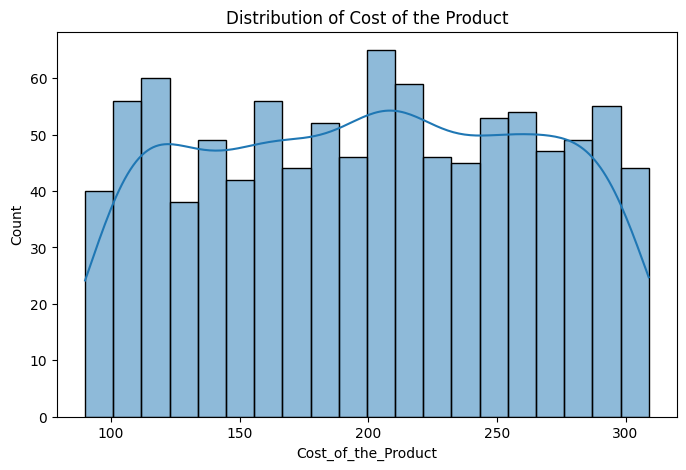

In [ ]:
plt.figure(figsize=(8,5))
sns.histplot(df['Cost_of_the_Product'], bins=20, kde=True)
plt.title("Distribution of Cost of the Product")
plt.show()


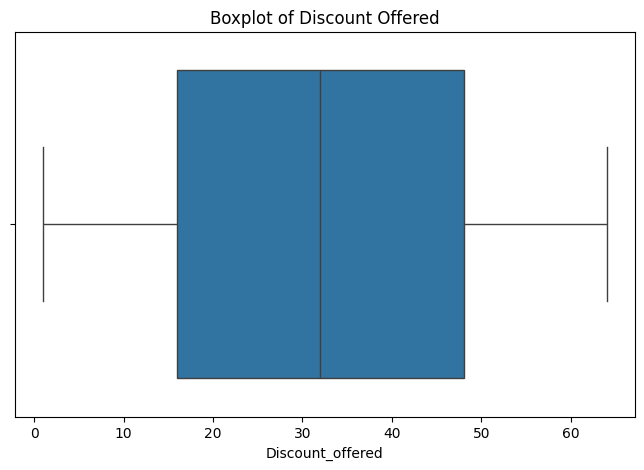

In [ ]:
plt.figure(figsize=(8,5))
sns.boxplot(x=df['Discount_offered'])
plt.title("Boxplot of Discount Offered")
plt.show()


In [ ]:
df.skew(numeric_only=True)


,0
ID,0.000000
Customer_care_calls,-0.028389
Customer_rating,0.027258
Cost_of_the_Product,-0.020105
Prior_purchases,-0.016479
Discount_offered,0.035434
Weight_in_gms,-0.058986
Reached.on.Time_Y.N,-0.020031


**Interrelation Analysis**

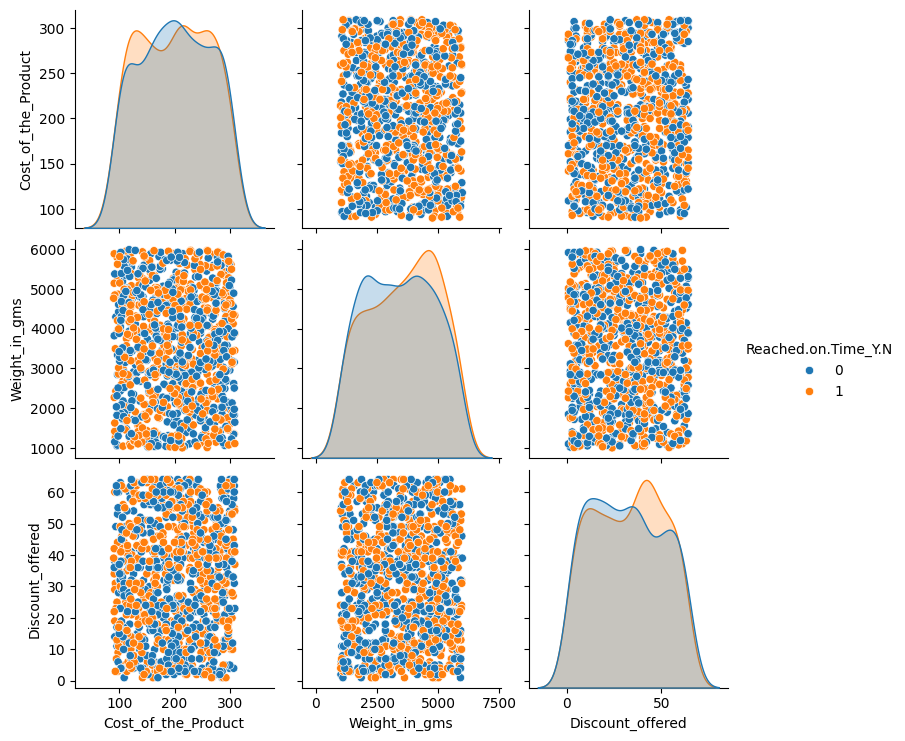

In [ ]:
sns.pairplot(
    df[['Cost_of_the_Product','Weight_in_gms','Discount_offered','Reached.on.Time_Y.N']],
    hue='Reached.on.Time_Y.N'
)
plt.show()


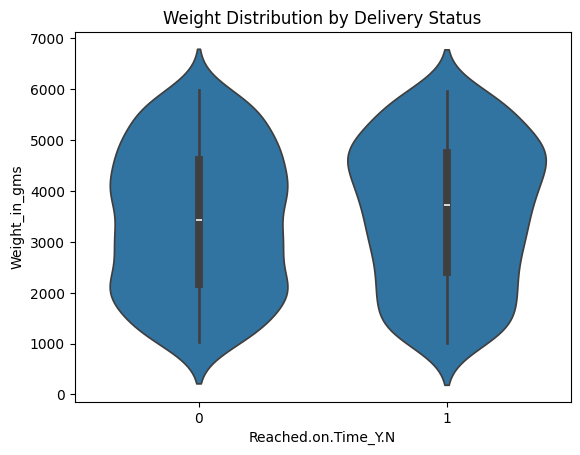

In [ ]:
sns.violinplot(x='Reached.on.Time_Y.N', y='Weight_in_gms', data=df)
plt.title("Weight Distribution by Delivery Status")
plt.show()


**Correlation Study**

In [ ]:
corr_matrix = df.corr(numeric_only=True)
corr_matrix


,ID,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
ID,1.000000,0.057622,0.039219,-0.014654,-0.007991,0.005271,0.049680,0.008172
Customer_care_calls,0.057622,1.000000,0.023522,0.041028,-0.063042,0.001900,-0.017701,-0.034813
Customer_rating,0.039219,0.023522,1.000000,0.028894,-0.009912,-0.053175,-0.005398,0.013481
Cost_of_the_Product,-0.014654,0.041028,0.028894,1.000000,0.047745,0.046533,0.000471,-0.016511
Prior_purchases,-0.007991,-0.063042,-0.009912,0.047745,1.000000,0.013632,0.009478,-0.020927
Discount_offered,0.005271,0.001900,-0.053175,0.046533,0.013632,1.000000,-0.001829,0.021903
Weight_in_gms,0.049680,-0.017701,-0.005398,0.000471,0.009478,-0.001829,1.000000,0.057007
Reached.on.Time_Y.N,0.008172,-0.034813,0.013481,-0.016511,-0.020927,0.021903,0.057007,1.000000


In [ ]:
corr_matrix['Reached.on.Time_Y.N'].sort_values(ascending=False)


,Reached.on.Time_Y.N
Reached.on.Time_Y.N,1.000000
Weight_in_gms,0.057007
Discount_offered,0.021903
Customer_rating,0.013481
ID,0.008172
Cost_of_the_Product,-0.016511
Prior_purchases,-0.020927
Customer_care_calls,-0.034813


**Data Manipulation**

In [ ]:
df['Cost_to_Weight_Ratio'] = df['Cost_of_the_Product'] / df['Weight_in_gms']
df.head()


,ID,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N,Cost_to_Weight_Ratio
0,1,C,Flight,2,5,306,6,high,M,45,3838,1,0.079729
1,2,F,Ship,7,2,114,3,high,M,35,2710,1,0.042066
2,3,B,Ship,7,2,215,7,medium,F,44,4152,0,0.051782
3,4,A,Road,5,3,126,5,medium,M,54,2245,0,0.056125
4,5,F,Ship,3,5,113,3,medium,M,43,1806,1,0.062569


In [ ]:
df.groupby('Mode_of_Shipment')['Discount_offered'].mean()


,Discount_offered
Mode_of_Shipment,
Flight,31.344720
Road,33.037681
Ship,31.519520


In [ ]:
df['Cost_Category'] = pd.cut(
    df['Cost_of_the_Product'],
    bins=3,
    labels=['Low','Medium','High']
)

df['Cost_Category'].value_counts()


,count
Cost_Category,
Medium,344
High,332
Low,324
